# Myers Briggs Personality Type Project

## Natural Language Processing analyzing tweets by various personality types

### By Nathan Fritter

Welcome to my NLP project. I have put alot of time and effort into this project, so I hope you will get alot out of this as well! Github code can be found [here](https://github.com/Njfritter/myersBriggsNLPAnalysis) if you'd like to clone or contribute. Let's get to it!

# Import necessary packages

The first part of any important python project is to setup the right environment. This notebook is included in the `myersBriggsNLPAnalysis` repo, and contains all required packages in the `requirements.txt` file. Follow the instructions on the README file on creating a virtual environment and downloading the necessary packages. Once there, we can run the first code blocks below!

## Check directory for data files

In [1]:
# The directory here should come with all necessary packages loaded in here
# Make sure you downloaded all of the packages in the "requirements.txt" file
# Input data files are available in the "data" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the data directory
# The matplotlib inline code needs to be imported at beginning of all jupyter notebooks
%matplotlib inline
import matplotlib.pyplot as plt
from subprocess import check_output
print(check_output(["ls", "/Users/nathanfritter/myProjects/dataScience/myRepos/myersBriggsNLPAnalysis/data/"]).decode("utf8"))

mbti_processed.csv
mbti_unprocessed.csv



# General Exploratory Analysis

In [4]:
# Import core data processing/manipulating packages
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Read in data files & check them out

In [17]:
# Any results you write to the current directory are saved as output.
unprocessed_data = '/Users/nathanfritter/myProjects/dataScience/myRepos/myersBriggsNLPAnalysis/data/mbti_unprocessed.csv'
processed_data = '/Users/nathanfritter/myProjects/dataScience/myRepos/myersBriggsNLPAnalysis/data/mbti_processed.csv'

# Basic stuff
columns = ['type', 'posts']
file = pd.read_csv(unprocessed_data)
print(file.columns)
print(file.shape)
print(file.head(5))
print(file.tail(5))

Index(['type', 'posts'], dtype='object')
(8675, 2)
   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
      type                                              posts
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...


In [20]:
# Processed file
columns = ['type', 'posts']
processed_file = pd.read_csv(processed_data)
print(processed_file.columns)
print(processed_file.shape)
print(processed_file.head(5))
print(processed_file.tail(5))

Index(['type', 'posts'], dtype='object')
(8675, 2)
   type                                              posts
0  INFJ  ['intj', 'moments', 'sportscenter', 'top', 'te...
1  ENTP  ['finding', 'lack', 'posts', 'alarming', 'sex'...
2  INTP  ['good', 'one', '_____', 'course', 'say', 'kno...
3  INTJ  ['dear', 'intp', 'enjoyed', 'conversation', 'd...
4  ENTJ  ['fired', 'another', 'silly', 'misconception',...
      type                                              posts
8670  ISFP  ['always', 'think', 'cats', 'fi', 'doms', 'rea...
8671  ENFP  ['thread', 'already', 'exists', 'someplace', '...
8672  INTP  ['many', 'questions', 'things', 'would', 'take...
8673  INFP  ['conflicted', 'right', 'comes', 'wanting', 'c...
8674  INFP  ['long', 'since', 'personalitycafe', 'although...


## Tokenize data, remove stopwords/hyperlinks/punctuation/etc.

This part is likely the longest part of this script. This next code block takes 20-30 minutes to run, so if you have something else you can do right now go for it!

Otherwise feel free to use the processed file that comes as a result of this! I have included it in the directory as 'mbti_processed.csv' (as defined above)

In [22]:
# Here we will:
# Tokenize data
# Remove stopwords, hyperlinks, punctuation, etc.
import csv
import re
from nltk import corpus
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
local_stopwords = []

# Tokenize words line by line
tokenizer = RegexpTokenizer(r'\w+')
i = 0
for index, line in file.iterrows():
    # Regular expressions
    line['posts'] = re.sub(r"(?:\@|https?\://)\S+", "", line['posts'])
    # Tokenize
    words = [word.lower() for word in tokenizer.tokenize(line['posts'])]
    words = [word for word in words if word not in stopwords.words('english') and word not in local_stopwords]
    line['posts'] = words
    if i % 100 == 0:
        print(i)
    i += 1

print(file.head(10))


TypeError: expected string or bytes-like object

In [21]:
# Split data into posts and type
# If you had time to tokenize the data here locally, use the code below
#mbtitype = np.array(file['type'])
#mbtiposts = np.array(file['posts'])

# Otherwise use this
mbtitype = np.array(processed_file['type'])
mbtiposts = np.array(processed_file['posts'])

## Show the Frequency of All Personality Types

Class imbalance can be a huge issue, so let's see how balanced our dataset is!

In [22]:
# Show unique labels
import nltk
unique, counts = np.unique(mbtitype, return_counts=True)
print(np.asarray((unique, counts)).T)

[['ENFJ' 190]
 ['ENFP' 675]
 ['ENTJ' 231]
 ['ENTP' 685]
 ['ESFJ' 42]
 ['ESFP' 48]
 ['ESTJ' 39]
 ['ESTP' 89]
 ['INFJ' 1470]
 ['INFP' 1832]
 ['INTJ' 1091]
 ['INTP' 1304]
 ['ISFJ' 166]
 ['ISFP' 271]
 ['ISTJ' 205]
 ['ISTP' 337]]


## Word Frequency of Top 25 Words

What words are these users mainly using? Let's find out

In [15]:
"""
# Get word frequencies
wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return wordlist
"""
# Separate out tweets into individual words
# Then show the top 25 most common
import re
words = []
for tweet in mbtiposts:
    # Split tweet into words by comma
    # Or else iterator splits by letter, not word
    tweet_words = tweet.split(',')
    for word in tweet_words:
      # Remove brackets at end of tweet and quotes
      word = re.sub(r"]", "", word)
      word = re.sub(r"\'", "", word)
      words.append(word)

words_top_25 = []
freq_top_25 = []
word_features = nltk.FreqDist(words)
print("\nMost frequent words with counts:")
for word, frequency in word_features.most_common(25):
    print('%s: %d' % (word, frequency))
    words_top_25.append(word.title())
    freq_top_25.append(frequency)
print("\n")


Most frequent words with counts:
 like: 69587
 think: 49669
 people: 47812
 one: 37115
 know: 36811
 really: 35196
 would: 34937
 get: 30777
 time: 27588
 feel: 23292
 much: 23098
 well: 22802
 love: 20955
 good: 20684
 things: 20472
 say: 20236
 way: 19642
 something: 19521
 want: 19346
 see: 19103
 also: 18294
 type: 17133
 even: 16897
 always: 16764
 lot: 16432




## Plotting Frequencies

### Personality Type Frequencies

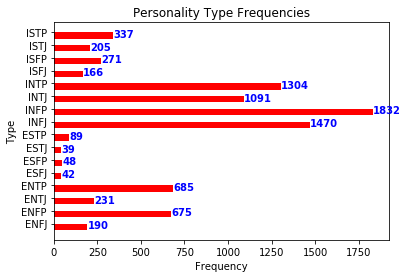

In [23]:
# Plot the counts of the personality types
# Horizontal Boxplots
fig, ax = plt.subplots()
width = 0.5
ind = np.arange(len(unique))
ax.barh(ind, counts, width, color = 'red')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(unique, minor = False)
for i, v in enumerate(counts):
    ax.text(v + 2, i - 0.125, str(v), color = 'blue', fontweight = 'bold')
plt.title('Personality Type Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Type')
plt.show()

### Top 25 Word Frequencies

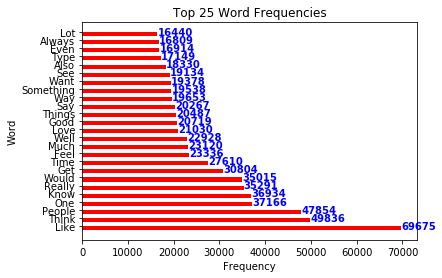

In [23]:
# Plot the counts of the 25 most frequent words
# Horizontal Boxplots
fig, ax = plt.subplots()
width = 0.5
ind = np.arange(len(words_top_25))
ax.barh(ind, freq_top_25, width, color = 'red')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(words_top_25, minor = False)
for i, v in enumerate(freq_top_25):
    ax.text(v + 2, i - 0.125, str(v), color = 'blue', fontweight = 'bold')
plt.title('Top 25 Word Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

### WordCloud

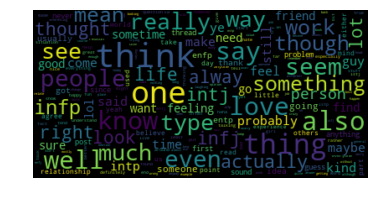

In [12]:
# Now to make bar graphs
# plt.plot(file['type'], type = 'bar')
from wordcloud import WordCloud
from os import path

wordcloud_words = " ".join(words)
# Lower max font size
wordcloud = WordCloud(max_font_size = 40).generate(wordcloud_words)
plt.figure()
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Model Training & Evaluation

Here we will prepare our prepped data for model training & evaluation. We will train simple models with default parameters to compare to each other and a baseline model; the more promising candidates will move ahead to parameter tuning. I chose three models:
- Multinomial Naive Bayes
- Linear Support Vector Machine
- Multi Layer Perceptron (simple Neural Network)

These three models have been shown to be very effective at Natural Language tasks. The first model is stunningly effective and simple based on Baye's Theorem. The second model maps the words into higher dimensional space and allows one to determine the boundaries for the different classes. The third model was chosen to see the effectiveness of neural networks on this problem (turns out to be effective). 

First we will split up the data into training and testing sets. Then we will train a dummy model and predict a couple of sentences I got from twitter accounts with personality type specific handles. Next, we will train and evaluate each of these models and compare them to each other AND a baseline model (here it will be simply predicting the majority class) to see which models we should go ahead with parameter tuning.

## Baseline Model: Predicting the Majority Class

In [30]:
# Baseline Model: Predicting "INFP" (majority class) every time
# Its accuracy will be simply the number of instances of "INFP" divided by the total number of records
majority = max(counts)
records = len(mbtitype)
P_majority = (majority/records)
print(P_majority)

0.21118155619596543


## Train Test Split

In [31]:
# Import libraries for model selection and feature extraction
from sklearn import (datasets, naive_bayes, feature_extraction, pipeline, linear_model,
metrics, neural_network, model_selection, feature_selection)

# Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(
mbtiposts, mbtitype, test_size=0.33, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

5812
2863
5812
2863


## Dummy Model Predicting a Few Sentences

In [32]:
# Extract features from text files
count_vect = feature_extraction.text.CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
X_train_counts = count_vect.fit_transform(X_train)
print(X_train_counts.shape)

tfidf_transformer = feature_extraction.text.TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(5812, 443)
(5812, 443)


/Users/nathanfritter/myProjects/dataScience/myRepos/myersBriggsNLPAnalysis/venv/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [15]:
# Training a classifer
clf = naive_bayes.MultinomialNB().fit(X_train_tfidf, y_train)
INTJ_sentence = ['Writing college essays is stressful because I have to give a stranger a piece of myself and that piece has to incorporate all of who I am']
INTJ_X_new_counts = count_vect.transform(INTJ_sentence)
INTJ_X_new_tfidf = tfidf_transformer.transform(INTJ_X_new_counts)

ENFP_sentence = ['Our favorite friendships are the ones where you can go from talking about the latest episode of the Bachelorette to the meaning of life']
ENFP_X_new_counts = count_vect.transform(ENFP_sentence)
ENFP_X_new_tfidf = tfidf_transformer.transform(ENFP_X_new_counts)
# Make a prediction of test sentence
predictedINTJ = clf.predict(INTJ_X_new_tfidf)
predictedENFP = clf.predict(ENFP_X_new_tfidf)
for words, category in zip(INTJ_sentence, predictedINTJ):
    print('%r => %s' % (INTJ_sentence, category))
for words, category in zip(ENFP_sentence, predictedENFP):
    print('%r => %s' % (ENFP_sentence, category))

['Writing college essays is stressful because I have to give a stranger a piece of myself and that piece has to incorporate all of who I am'] => INFP
['Our favorite friendships are the ones where you can go from talking about the latest episode of the Bachelorette to the meaning of life'] => INFP


Unfortunately the algorithm predicts the majority class for both; this may be a problem going forward for this model. Let's look how it performs on the testing set:

## Naive Bayes Model

In [16]:
# Naive Bayes model fitting and predictions
# Building a Pipeline; this does all of the work in extract_and_train() at once
# Here we use as many default parameters as possible to establish a baseline
text_clf_nb = pipeline.Pipeline([('vect', feature_extraction.text.CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)),
                     ('tfidf', feature_extraction.text.TfidfTransformer()),
                     ('chi2', feature_selection.SelectKBest(feature_selection.chi2, k = 'all')),
                     ('clf', naive_bayes.MultinomialNB())
                     ])

text_clf_nb = text_clf_nb.fit(X_train, y_train)

# Evaluate performance on test set
predicted_nb = text_clf_nb.predict(X_test)
print("Training set score: %f" % text_clf_nb.score(X_train, y_train))
print("Test set score: %f" % text_clf_nb.score(X_test, y_test))
print("Test error rate: %f" % (1 - text_clf_nb.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points for the Naive Bayes algorithm : %d"
% (X_test.shape[0],(y_test != predicted_nb).sum()))


Training set score: 0.218685
Test set score: 0.216556
Test error rate: 0.783444
Number of mislabeled points out of a total 2863 points for the Naive Bayes algorithm : 2243


This model hardly does better than the baseline model. As a result, we should not consider it a final candidate for parameter tuning.

## Linear Support Vector Machine

In [30]:
# Linear Support Vector Machine
# Build Pipeline again with default parameters
text_clf_svm = pipeline.Pipeline([('vect', feature_extraction.text.CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)),
                         ('tfidf', feature_extraction.text.TfidfTransformer()),
                         ('chi2', feature_selection.SelectKBest(feature_selection.chi2, k = 'all')),
                         ('clf', linear_model.SGDClassifier(random_state=42, verbose = 5)),
                        ])

text_clf_svm = text_clf_svm.fit(X_train, y_train)

# Evaluate performance on test set
predicted_svm = text_clf_svm.predict(X_test)
print("Training set score: %f" % text_clf_svm.score(X_train, y_train))
print("Test set score: %f" % text_clf_svm.score(X_test, y_test))
print("Test error rate: %f" % (1 - text_clf_svm.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points for the Linear SVM algorithm: %d"
% (X_test.shape[0],(y_test != predicted_svm).sum()))


/Users/nathanfritter/myProjects/dataScience/myRepos/myersBriggsNLPAnalysis/venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 22.68, NNZs: 17032, Bias: -1.026414, T: 5812, Avg. loss: 0.053866
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 20.25, NNZs: 20596, Bias: -1.163897, T: 11624, Avg. loss: 0.025638
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 19.09, NNZs: 22902, Bias: -1.155032, T: 17436, Avg. loss: 0.020449
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 18.58, NNZs: 24668, Bias: -1.155633, T: 23248, Avg. loss: 0.016780
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 18.25, NNZs: 26274, Bias: -1.160652, T: 29060, Avg. loss: 0.015177
Total training time: 0.04 seconds.
-- Epoch 1
Norm: 40.33, NNZs: 31050, Bias: -1.285785, T: 5812, Avg. loss: 0.155512
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 34.74, NNZs: 36234, Bias: -1.238007, T: 11624, Avg. loss: 0.070225
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 32.88, NNZs: 39631, Bias: -1.245557, T: 17436, Avg. loss: 0.052871
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 32.04, NNZs: 42028, Bias: -1.2456

Norm: 30.27, NNZs: 23120, Bias: -0.984023, T: 5812, Avg. loss: 0.086636
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 26.83, NNZs: 27661, Bias: -1.048559, T: 11624, Avg. loss: 0.038907
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 25.49, NNZs: 30933, Bias: -1.062217, T: 17436, Avg. loss: 0.028211
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 24.75, NNZs: 33339, Bias: -1.051808, T: 23248, Avg. loss: 0.023462
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 24.34, NNZs: 35073, Bias: -1.047621, T: 29060, Avg. loss: 0.021523
Total training time: 0.04 seconds.


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished


Training set score: 0.982622
Test set score: 0.664687
Test error rate: 0.335313
Number of mislabeled points out of a total 2863 points for the Linear SVM algorithm: 960


Here this model does a lot better. We will save it as a candidate for parameter tuning later.

## Neural Network Model

In [20]:
# NEURAL NETWORK
# Trying default parameters
text_clf_nn = pipeline.Pipeline([('vect', feature_extraction.text.CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)),
                         ('tfidf', feature_extraction.text.TfidfTransformer()),
                         ('chi2', feature_selection.SelectKBest(feature_selection.chi2, k = 'all')),
                         ('clf', neural_network.MLPClassifier(verbose=10, random_state=42)),
                        ])

text_clf_nn.fit(X_train, y_train)
# Evaluate performance on test set
predicted_nn = text_clf_nn.predict(X_test)
print("Training set score: %f" % text_clf_nn.score(X_train, y_train))
print("Test set score: %f" % text_clf_nn.score(X_test, y_test))
print("Test error rate: %f" % (1 - text_clf_nn.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points for the Linear SVM algorithm: %d"
% (X_test.shape[0],(y_test != predicted_nn).sum()))

Iteration 1, loss = 2.56177262
Iteration 2, loss = 2.16698930
Iteration 3, loss = 1.92676434
Iteration 4, loss = 1.60127150
Iteration 5, loss = 1.25655122
Iteration 6, loss = 0.93353109
Iteration 7, loss = 0.67084782
Iteration 8, loss = 0.47647478
Iteration 9, loss = 0.33973486
Iteration 10, loss = 0.24567950
Iteration 11, loss = 0.18181283
Iteration 12, loss = 0.13802468
Iteration 13, loss = 0.10810798
Iteration 14, loss = 0.08623084
Iteration 15, loss = 0.07104823
Iteration 16, loss = 0.05961285
Iteration 17, loss = 0.05109463
Iteration 18, loss = 0.04453863
Iteration 19, loss = 0.03943860
Iteration 20, loss = 0.03538558
Iteration 21, loss = 0.03209223
Iteration 22, loss = 0.02938344
Iteration 23, loss = 0.02711073
Iteration 24, loss = 0.02519289
Iteration 25, loss = 0.02358305
Iteration 26, loss = 0.02222914
Iteration 27, loss = 0.02101431
Iteration 28, loss = 0.01992941
Iteration 29, loss = 0.01895516
Iteration 30, loss = 0.01808421
Iteration 31, loss = 0.01729879
Iteration 32, los

This model did not do as well as the Linear Support Vector Machine, but did well enough to warrant further consideration for parameter tuning. 

So the two candidates we will move ahead with are the Linear Support Vector Machine and the Neural Network.

# Parameter Tuning

We will tune the Linear Support Vector Machine first (if you are wondering about these specific parameters, check out the sci-kit learn docs!) 

Some of these parameters correspond to different parts of the training pipeline. For example the `ngram_range` parameter is tied to the `CountVectorizer` part of the pipeline named `vect` (which you can see in the previous code chunks). The `alpha`, `penalty`, and the three bottom parameters are tied to the model itself named `clf` in the pipeline. Hopefully this gives you enough insight to change the parameters variable without too much hassle.

## Linear Support Vector Machine

In [2]:
# Tune parameters for Linear Support Vector Machine
parameters_svm = {
  'vect__ngram_range': [(1, 1), (1, 2)],
  'tfidf__use_idf': (True, False),
  'clf__alpha': (1e-2, 1e-3),
  'clf__penalty': ['l2', 'l1', 'elasticnet'],
  'clf__l1_ratio': (0, 0.5, 1),
  'clf__learning_rate': ['optimal'],
  'clf__eta0': (0.25, 0.5, 0.75)
}

text_clf_svm = pipeline.Pipeline([('vect', feature_extraction.text.CountVectorizer()),
                         ('tfidf', feature_extraction.text.TfidfTransformer()),
                         ('chi2', feature_selection.SelectKBest(feature_selection.chi2, k = 'all')),
                         ('clf', linear_model.SGDClassifier(random_state=42, verbose = 5)),
                        ])

gs_clf_svm = model_selection.GridSearchCV(text_clf_svm, parameters_svm, n_jobs=1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)

best_parameters, score, _ = max(gs_clf_svm.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

print(score)

NameError: name 'model_selection' is not defined

## Neural Network

In [31]:
# Tune parameters for Neural Network
parameters_nn = {
  'vect__ngram_range': [(1, 1), (1, 2)],
  'tfidf__use_idf': (True, False),
  'clf__learning_rate_init': (1e-1, 5e-1),
  'clf__hidden_layer_sizes': (50, 100),
  'clf__activation': ['identity', 'tanh', 'relu']
}

text_clf_nn = pipeline.Pipeline([('vect', feature_extraction.text.CountVectorizer()),
                         ('tfidf', feature_extraction.text.TfidfTransformer()),
                         ('chi2', feature_selection.SelectKBest(feature_selection.chi2, k = 'all')),
                         ('clf', neural_network.MLPClassifier(verbose=10, random_state=42)),
                        ])

gs_clf_nn = model_selection.GridSearchCV(text_clf_nn, parameters_nn, n_jobs=1)
gs_clf_nn = gs_clf_nn.fit(X_train, y_train)


best_parameters, score, _ = max(gs_clf_nn.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))


    print(score)


# Cross Validation Score
scores = cross_val_score(text_clf_three, X_train, y_train, cv = 5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

PicklingError: Can't pickle <function <lambda> at 0x13db92400>: attribute lookup <lambda> on __main__ failed

It looks like the Linear Support Vector Machine is the way to go. Even though the Neural Network may have higher accuracy, it simply takes too much time to train compared to the simpler SVM. Next I will use the ideal parameters and train a final, tuned model on the data.

# Training the Final Model

In [35]:
text_clf_final = pipeline.Pipeline(
    [('vect', feature_extraction.text.CountVectorizer(ngram_range = (1, 1), tokenizer=lambda doc: doc, lowercase=False)),
     ('tfidf', feature_extraction.text.TfidfTransformer(use_idf = True)),
     ('chi2', feature_selection.SelectKBest(feature_selection.chi2, k = 'all')),
     ('clf', linear_model.SGDClassifier(loss='hinge',
                                        penalty='l2',
                                        l1_ratio = 0,
                                        alpha=1e-3,
                                        eta0 = 0.25,
                                        max_iter=5,
                                        learning_rate = 'optimal',
                                        verbose = 10,
                                        random_state=42)),
    ])

text_clf_final = text_clf_final.fit(X_train, y_train)

# Evaluate performance on test set
predicted_final = text_clf_final.predict(X_test)
print("Training set score: %f" % text_clf_final.score(X_train, y_train))
print("Test set score: %f" % text_clf_final.score(X_test, y_test))
print("Test error rate: %f" % (1 - text_clf_final.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points for the Linear SVM algorithm: %d"
  % (X_test.shape[0],(y_test != predicted_final).sum()))

-- Epoch 1
Norm: 3.19, NNZs: 19448, Bias: -0.883523, T: 5812, Avg. loss: 0.047681
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.58, NNZs: 23423, Bias: -0.923490, T: 11624, Avg. loss: 0.042019
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.35, NNZs: 25922, Bias: -0.932504, T: 17436, Avg. loss: 0.041314
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.26, NNZs: 28090, Bias: -0.941905, T: 23248, Avg. loss: 0.040748
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 2.21, NNZs: 29899, Bias: -0.948779, T: 29060, Avg. loss: 0.040600
Total training time: 0.04 seconds.
-- Epoch 1
Norm: 6.05, NNZs: 34884, Bias: -0.926474, T: 5812, Avg. loss: 0.157803
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 5.53, NNZs: 40232, Bias: -0.946133, T: 11624, Avg. loss: 0.140064
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 5.41, NNZs: 42952, Bias: -0.961495, T: 17436, Avg. loss: 0.137095
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 5.35, NNZs: 44548, Bias: -0.973348, T: 23

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s


Norm: 1.37, NNZs: 19500, Bias: -0.903413, T: 29060, Avg. loss: 0.010264
Total training time: 0.04 seconds.
-- Epoch 1
Norm: 2.45, NNZs: 12281, Bias: -0.807519, T: 5812, Avg. loss: 0.015372
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 15272, Bias: -0.856415, T: 11624, Avg. loss: 0.012416
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.55, NNZs: 17407, Bias: -0.878269, T: 17436, Avg. loss: 0.012013
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 19323, Bias: -0.892749, T: 23248, Avg. loss: 0.011863
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.35, NNZs: 20784, Bias: -0.903209, T: 29060, Avg. loss: 0.011793
Total training time: 0.04 seconds.
-- Epoch 1
Norm: 2.26, NNZs: 10055, Bias: -0.814468, T: 5812, Avg. loss: 0.008918
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.61, NNZs: 12604, Bias: -0.855792, T: 11624, Avg. loss: 0.006617
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.38, NNZs: 14549, Bias: -0.876891, T: 17436, Avg. l

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


Norm: 11.02, NNZs: 65728, Bias: -0.889651, T: 23248, Avg. loss: 0.305245
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 10.99, NNZs: 66147, Bias: -0.898919, T: 29060, Avg. loss: 0.304247
Total training time: 0.05 seconds.
-- Epoch 1
Norm: 7.71, NNZs: 45961, Bias: -0.851632, T: 5812, Avg. loss: 0.250827
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 7.18, NNZs: 51710, Bias: -0.872560, T: 11624, Avg. loss: 0.225132
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 7.04, NNZs: 54069, Bias: -0.886996, T: 17436, Avg. loss: 0.219567
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 6.98, NNZs: 55421, Bias: -0.897420, T: 23248, Avg. loss: 0.217607
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 6.94, NNZs: 56120, Bias: -0.904276, T: 29060, Avg. loss: 0.216794
Total training time: 0.04 seconds.
-- Epoch 1
Norm: 8.29, NNZs: 49499, Bias: -0.837864, T: 5812, Avg. loss: 0.284523
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 7.77, NNZs: 55686, Bias: -0.858635, T: 11624, Avg.

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.7s finished


Training set score: 0.906917
Test set score: 0.668180
Test error rate: 0.331820
Number of mislabeled points out of a total 2863 points for the Linear SVM algorithm: 950


## Cross Validation

Let's see if we can get better results through cross validation:

In [39]:
# Cross Validation Score
scores = model_selection.cross_val_score(text_clf_final, X_train, y_train, cv = 5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

-- Epoch 1
Norm: 3.53, NNZs: 16754, Bias: -0.889566, T: 4643, Avg. loss: 0.047932
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.84, NNZs: 20058, Bias: -0.922740, T: 9286, Avg. loss: 0.041174
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.63, NNZs: 22650, Bias: -0.934634, T: 13929, Avg. loss: 0.040243
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.54, NNZs: 24436, Bias: -0.944144, T: 18572, Avg. loss: 0.039642
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 2.49, NNZs: 25834, Bias: -0.949760, T: 23215, Avg. loss: 0.039410
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 6.44, NNZs: 31592, Bias: -0.888477, T: 4643, Avg. loss: 0.160008
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 5.90, NNZs: 36373, Bias: -0.920959, T: 9286, Avg. loss: 0.137903
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5.73, NNZs: 39029, Bias: -0.929261, T: 13929, Avg. loss: 0.135235
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 5.67, NNZs: 40679, Bias: -0.945136, T: 1857

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s


Norm: 1.65, NNZs: 10585, Bias: -0.864537, T: 9286, Avg. loss: 0.006453
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.37, NNZs: 12490, Bias: -0.880940, T: 13929, Avg. loss: 0.006226
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.27, NNZs: 13980, Bias: -0.895315, T: 18572, Avg. loss: 0.006094
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 15263, Bias: -0.903789, T: 23215, Avg. loss: 0.006051
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 2.95, NNZs: 12913, Bias: -0.851015, T: 4643, Avg. loss: 0.024580
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.21, NNZs: 15890, Bias: -0.889121, T: 9286, Avg. loss: 0.020124
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.96, NNZs: 18131, Bias: -0.905490, T: 13929, Avg. loss: 0.019670
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.82, NNZs: 19650, Bias: -0.912588, T: 18572, Avg. loss: 0.019404
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.75, NNZs: 21398, Bias: -0.919474, T: 23215, Avg. lo

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


Norm: 2.68, NNZs: 18842, Bias: -0.895280, T: 9286, Avg. loss: 0.032023
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.46, NNZs: 21349, Bias: -0.909316, T: 13929, Avg. loss: 0.031209
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.37, NNZs: 23453, Bias: -0.919500, T: 18572, Avg. loss: 0.030926
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.31, NNZs: 25267, Bias: -0.924664, T: 23215, Avg. loss: 0.030707
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 3.96, NNZs: 19745, Bias: -0.878504, T: 4643, Avg. loss: 0.066645
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 3.28, NNZs: 24307, Bias: -0.907656, T: 9286, Avg. loss: 0.057128
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 3.08, NNZs: 27293, Bias: -0.922989, T: 13929, Avg. loss: 0.055777
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.98, NNZs: 29491, Bias: -0.927221, T: 18572, Avg. loss: 0.054929
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.94, NNZs: 31014, Bias: -0.934778, T: 23215, Avg. lo

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished


-- Epoch 1
Norm: 3.68, NNZs: 17469, Bias: -0.837786, T: 4645, Avg. loss: 0.048565
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.92, NNZs: 21304, Bias: -0.883419, T: 9290, Avg. loss: 0.041667
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.67, NNZs: 23770, Bias: -0.900869, T: 13935, Avg. loss: 0.040337
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.57, NNZs: 25698, Bias: -0.914392, T: 18580, Avg. loss: 0.039940
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.51, NNZs: 27257, Bias: -0.921976, T: 23225, Avg. loss: 0.039656
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 6.76, NNZs: 31390, Bias: -0.895498, T: 4645, Avg. loss: 0.156346
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 6.10, NNZs: 36386, Bias: -0.925236, T: 9290, Avg. loss: 0.136591
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5.94, NNZs: 38989, Bias: -0.943688, T: 13935, Avg. loss: 0.132701
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 5.87, NNZs: 40651, Bias: -0.954749, T: 1858

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s


Norm: 1.92, NNZs: 11954, Bias: -0.802989, T: 9290, Avg. loss: 0.006587
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.67, NNZs: 13646, Bias: -0.830223, T: 13935, Avg. loss: 0.006283
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.47, NNZs: 14885, Bias: -0.842255, T: 18580, Avg. loss: 0.006160
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.40, NNZs: 16167, Bias: -0.855647, T: 23225, Avg. loss: 0.006085
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 3.05, NNZs: 13861, Bias: -0.817050, T: 4645, Avg. loss: 0.024863
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.29, NNZs: 16855, Bias: -0.859744, T: 9290, Avg. loss: 0.020269
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.03, NNZs: 19186, Bias: -0.879486, T: 13935, Avg. loss: 0.019780
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.90, NNZs: 21134, Bias: -0.891959, T: 18580, Avg. loss: 0.019514
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 22512, Bias: -0.898588, T: 23225, Avg. lo

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


Norm: 2.72, NNZs: 19853, Bias: -0.867344, T: 9290, Avg. loss: 0.032884
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.48, NNZs: 22208, Bias: -0.887098, T: 13935, Avg. loss: 0.031953
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.36, NNZs: 24438, Bias: -0.899490, T: 18580, Avg. loss: 0.031649
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 2.28, NNZs: 25975, Bias: -0.905478, T: 23225, Avg. loss: 0.031452
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 4.10, NNZs: 20101, Bias: -0.854343, T: 4645, Avg. loss: 0.066581
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 3.36, NNZs: 24734, Bias: -0.891884, T: 9290, Avg. loss: 0.056949
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 3.13, NNZs: 27673, Bias: -0.902818, T: 13935, Avg. loss: 0.055608
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 3.04, NNZs: 29868, Bias: -0.914874, T: 18580, Avg. loss: 0.055010
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.98, NNZs: 30977, Bias: -0.921780, T: 23225, Avg. lo

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished


-- Epoch 1
Norm: 3.49, NNZs: 17035, Bias: -0.882947, T: 4648, Avg. loss: 0.049600
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.73, NNZs: 20562, Bias: -0.910791, T: 9296, Avg. loss: 0.041910
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.53, NNZs: 23352, Bias: -0.930659, T: 13944, Avg. loss: 0.040661
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.43, NNZs: 25401, Bias: -0.939574, T: 18592, Avg. loss: 0.040328
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 2.37, NNZs: 27042, Bias: -0.946664, T: 23240, Avg. loss: 0.040060
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 6.61, NNZs: 31837, Bias: -0.886711, T: 4648, Avg. loss: 0.159967
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 6.01, NNZs: 37005, Bias: -0.918256, T: 9296, Avg. loss: 0.137511
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5.83, NNZs: 39676, Bias: -0.924663, T: 13944, Avg. loss: 0.133784
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 5.75, NNZs: 40784, Bias: -0.938322, T: 1859

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s


Norm: 2.44, NNZs: 9086, Bias: -0.783463, T: 4648, Avg. loss: 0.009044
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 11553, Bias: -0.834497, T: 9296, Avg. loss: 0.006548
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.51, NNZs: 13325, Bias: -0.856507, T: 13944, Avg. loss: 0.006317
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.37, NNZs: 14748, Bias: -0.871461, T: 18592, Avg. loss: 0.006176
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.27, NNZs: 15729, Bias: -0.880293, T: 23240, Avg. loss: 0.006122
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 3.01, NNZs: 13918, Bias: -0.843927, T: 4648, Avg. loss: 0.024994
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.27, NNZs: 17405, Bias: -0.885213, T: 9296, Avg. loss: 0.020475
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.01, NNZs: 19423, Bias: -0.902673, T: 13944, Avg. loss: 0.019999
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.87, NNZs: 21247, Bias: -0.911559, T: 18592, Avg. loss

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


Norm: 3.45, NNZs: 15905, Bias: -0.852539, T: 4648, Avg. loss: 0.038647
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.71, NNZs: 19571, Bias: -0.884338, T: 9296, Avg. loss: 0.032635
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.46, NNZs: 21909, Bias: -0.899296, T: 13944, Avg. loss: 0.031808
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.35, NNZs: 24008, Bias: -0.909762, T: 18592, Avg. loss: 0.031583
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 2.28, NNZs: 25698, Bias: -0.915667, T: 23240, Avg. loss: 0.031308
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 4.05, NNZs: 20137, Bias: -0.859213, T: 4648, Avg. loss: 0.066397
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 3.32, NNZs: 24338, Bias: -0.888864, T: 9296, Avg. loss: 0.057128
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 3.10, NNZs: 27770, Bias: -0.907082, T: 13944, Avg. loss: 0.055860
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.99, NNZs: 30091, Bias: -0.914372, T: 18592, Avg. los

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished


-- Epoch 1
Norm: 3.46, NNZs: 17152, Bias: -0.877297, T: 4655, Avg. loss: 0.050337
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.79, NNZs: 20696, Bias: -0.912338, T: 9310, Avg. loss: 0.042036
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.57, NNZs: 23380, Bias: -0.926246, T: 13965, Avg. loss: 0.040859
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.48, NNZs: 25365, Bias: -0.938113, T: 18620, Avg. loss: 0.040452
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.42, NNZs: 26861, Bias: -0.942310, T: 23275, Avg. loss: 0.040134
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 6.80, NNZs: 31969, Bias: -0.858870, T: 4655, Avg. loss: 0.159855
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 6.05, NNZs: 37221, Bias: -0.899510, T: 9310, Avg. loss: 0.138126
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5.87, NNZs: 39885, Bias: -0.916667, T: 13965, Avg. loss: 0.133911
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 5.79, NNZs: 41167, Bias: -0.925472, T: 1862

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s


Norm: 2.57, NNZs: 9204, Bias: -0.799640, T: 4655, Avg. loss: 0.008911
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 11453, Bias: -0.837605, T: 9310, Avg. loss: 0.006423
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.54, NNZs: 13259, Bias: -0.860003, T: 13965, Avg. loss: 0.006199
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.40, NNZs: 14939, Bias: -0.874097, T: 18620, Avg. loss: 0.006075
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.29, NNZs: 16122, Bias: -0.882337, T: 23275, Avg. loss: 0.006033
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 3.01, NNZs: 13457, Bias: -0.813418, T: 4655, Avg. loss: 0.025859
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.29, NNZs: 16724, Bias: -0.859904, T: 9310, Avg. loss: 0.020659
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.06, NNZs: 19059, Bias: -0.885453, T: 13965, Avg. loss: 0.020109
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.90, NNZs: 21307, Bias: -0.894232, T: 18620, Avg. loss

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


Norm: 7.97, NNZs: 54953, Bias: -0.847407, T: 23275, Avg. loss: 0.238478
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 3.36, NNZs: 15508, Bias: -0.848237, T: 4655, Avg. loss: 0.039148
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.64, NNZs: 19235, Bias: -0.883667, T: 9310, Avg. loss: 0.032908
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.38, NNZs: 21933, Bias: -0.896309, T: 13965, Avg. loss: 0.032125
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.29, NNZs: 24296, Bias: -0.907887, T: 18620, Avg. loss: 0.031784
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.22, NNZs: 25801, Bias: -0.915382, T: 23275, Avg. loss: 0.031569
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 4.21, NNZs: 20090, Bias: -0.862144, T: 4655, Avg. loss: 0.065800
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 3.39, NNZs: 24162, Bias: -0.886675, T: 9310, Avg. loss: 0.057039
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 3.20, NNZs: 27556, Bias: -0.906090, T: 13965, Avg. los

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished


-- Epoch 1
Norm: 3.75, NNZs: 17792, Bias: -0.840402, T: 4657, Avg. loss: 0.049409
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.90, NNZs: 21076, Bias: -0.876619, T: 9314, Avg. loss: 0.041840
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.67, NNZs: 23773, Bias: -0.900749, T: 13971, Avg. loss: 0.040956
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.55, NNZs: 26008, Bias: -0.914015, T: 18628, Avg. loss: 0.040442
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.48, NNZs: 27669, Bias: -0.920931, T: 23285, Avg. loss: 0.040138
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 6.63, NNZs: 31293, Bias: -0.862293, T: 4657, Avg. loss: 0.158060
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 6.07, NNZs: 36464, Bias: -0.905366, T: 9314, Avg. loss: 0.136061
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5.92, NNZs: 39148, Bias: -0.928699, T: 13971, Avg. loss: 0.133277
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 5.84, NNZs: 40806, Bias: -0.934522, T: 1862

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s


Norm: 1.60, NNZs: 13362, Bias: -0.832416, T: 13971, Avg. loss: 0.006703
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.49, NNZs: 14757, Bias: -0.851188, T: 18628, Avg. loss: 0.006558
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.38, NNZs: 15997, Bias: -0.861041, T: 23285, Avg. loss: 0.006454
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 3.07, NNZs: 13450, Bias: -0.805026, T: 4657, Avg. loss: 0.025128
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.30, NNZs: 16626, Bias: -0.848838, T: 9314, Avg. loss: 0.020587
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.05, NNZs: 19003, Bias: -0.873000, T: 13971, Avg. loss: 0.020127
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.92, NNZs: 20978, Bias: -0.887223, T: 18628, Avg. loss: 0.019836
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 22545, Bias: -0.896220, T: 23285, Avg. loss: 0.019731
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 10.59, NNZs: 45555, Bias: -0.850258, T: 4657, Avg. l

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


Norm: 2.84, NNZs: 19518, Bias: -0.861884, T: 9314, Avg. loss: 0.032324
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.57, NNZs: 22142, Bias: -0.879234, T: 13971, Avg. loss: 0.031736
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.44, NNZs: 24204, Bias: -0.890280, T: 18628, Avg. loss: 0.031272
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.38, NNZs: 25690, Bias: -0.900853, T: 23285, Avg. loss: 0.031042
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 3.98, NNZs: 19933, Bias: -0.854718, T: 4657, Avg. loss: 0.067258
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 3.31, NNZs: 24341, Bias: -0.892155, T: 9314, Avg. loss: 0.057768
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 3.07, NNZs: 27167, Bias: -0.905948, T: 13971, Avg. loss: 0.056329
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.98, NNZs: 29430, Bias: -0.919039, T: 18628, Avg. loss: 0.055607
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.93, NNZs: 31008, Bias: -0.926761, T: 23285, Avg. lo

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished


[0.66295979 0.65809769 0.65893471 0.67847882 0.64502165]
Accuracy: 0.66 (+/- 0.02)


We get a decent result from the final tuned model. It is marginally better than the default model, so the default model in terms of balance between simplicity and accuracy, is the way to go. 

Here's some extra goodies before you go!

# Extras

## Success Rates Predicting Each Type

Sometimes it's not enough to just look at simple metrics, as you can lose valuable information (such as predictive accuracy for each class). Let's look at the success rates here:

In [36]:
# Display success rate of predictions for each type
labels = y_test
predictions = predicted_final
labels_pred = pd.DataFrame(labels, columns = ['label'])
labels_pred['predicted'] = predictions
labels_pred['success'] = (labels_pred['predicted'] == labels)

for name, group in labels_pred.groupby('label'):
    frac = sum(group['success'])/len(group)
    print('Success rate for labeling personality type %s: %f' % (name, frac))

Success rate for labeling personality type ENFJ: 0.112903
Success rate for labeling personality type ENFP: 0.561321
Success rate for labeling personality type ENTJ: 0.356164
Success rate for labeling personality type ENTP: 0.590909
Success rate for labeling personality type ESFJ: 0.100000
Success rate for labeling personality type ESFP: 0.000000
Success rate for labeling personality type ESTJ: 0.000000
Success rate for labeling personality type ESTP: 0.222222
Success rate for labeling personality type INFJ: 0.749474
Success rate for labeling personality type INFP: 0.875606
Success rate for labeling personality type INTJ: 0.657817
Success rate for labeling personality type INTP: 0.818182
Success rate for labeling personality type ISFJ: 0.430769
Success rate for labeling personality type ISFP: 0.247312
Success rate for labeling personality type ISTJ: 0.246753
Success rate for labeling personality type ISTP: 0.592593


Now let's dig deeper and look at the the predicted classes versus their actual label:

## Prediction Label Cross Tab

In [38]:
test_crosstb_final = pd.crosstab(index = labels, columns = predictions, rownames = ['class'], colnames = ['prediction'])
print(test_crosstb_final)

prediction  ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESTP  INFJ  INFP  INTJ  INTP  ISFJ  \
class                                                                          
ENFJ           7     8     0     1     0     0    19    20     2     4     0   
ENFP           1   119     0     7     0     1    20    36    18     9     0   
ENTJ           1     5    26     6     0     0     3     4    16    10     0   
ENTP           0    11     2   130     0     1    21    15    14    23     0   
ESFJ           0     0     0     1     1     0     1     2     0     4     0   
ESFP           0     3     2     1     0     0     0     3     1     1     0   
ESTJ           0     3     1     1     0     0     3     7     0     3     0   
ESTP           0     0     0     1     0     6     6     2     1     7     0   
INFJ           1     5     2    10     0     0   356    65    15    18     0   
INFP           1    11     1     7     0     0    20   542     8    24     0   
INTJ           1     9     2     7     0

While the algorithm does a pretty good job for each class, the types that have higher frequencies in the dataset (INFJ, INFP, INTP, INTJ) seem to get predicted the most.

This is a classic problem in classification problems: the model is only as good as the data that goes into it. If the data has more instances of a certain class, it will have more information on that class and will be biased towards that class for future predictions. 

All in all, not a bad overall result!

# Closing Remarks

Thank you very much for making it all the way to the end of this notebook. You can contribute to the Github for this project mentioned [here](https://github.com/Njfritter/myersBriggsNLPAnalysis) or at the top. Always looking to improve projects or documentation, so let me know if anything needs tending to!

Also check out my Github [here](https://github.com/Njfritter) for more interesting data projects!